In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")



In [31]:
train_df = pd.read_csv('/kaggle/input/boston-dataset/train.csv')
test_df = pd.read_csv('/kaggle/input/boston-dataset/test.csv')


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [12]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,333.0,250.951952,147.859438,1.00000,123.00000,244.00000,377.00000,506.0000
crim,333.0,3.360341,7.352272,0.00632,0.07896,0.26169,3.67822,73.5341
zn,333.0,10.689189,22.674762,0.00000,0.00000,0.00000,12.50000,100.0000
indus,333.0,11.293483,6.998123,0.74000,5.13000,9.90000,18.10000,27.7400
chas,333.0,0.060060,0.237956,0.00000,0.00000,0.00000,0.00000,1.0000
nox,333.0,0.557144,0.114955,0.38500,0.45300,0.53800,0.63100,0.8710
rm,333.0,6.265619,0.703952,3.56100,5.88400,6.20200,6.59500,8.7250
age,333.0,68.226426,28.133344,6.00000,45.40000,76.70000,93.80000,100.0000
dis,333.0,3.709934,1.981123,1.12960,2.12240,3.09230,5.11670,10.7103
rad,333.0,9.633634,8.742174,1.00000,4.00000,5.00000,24.00000,24.0000


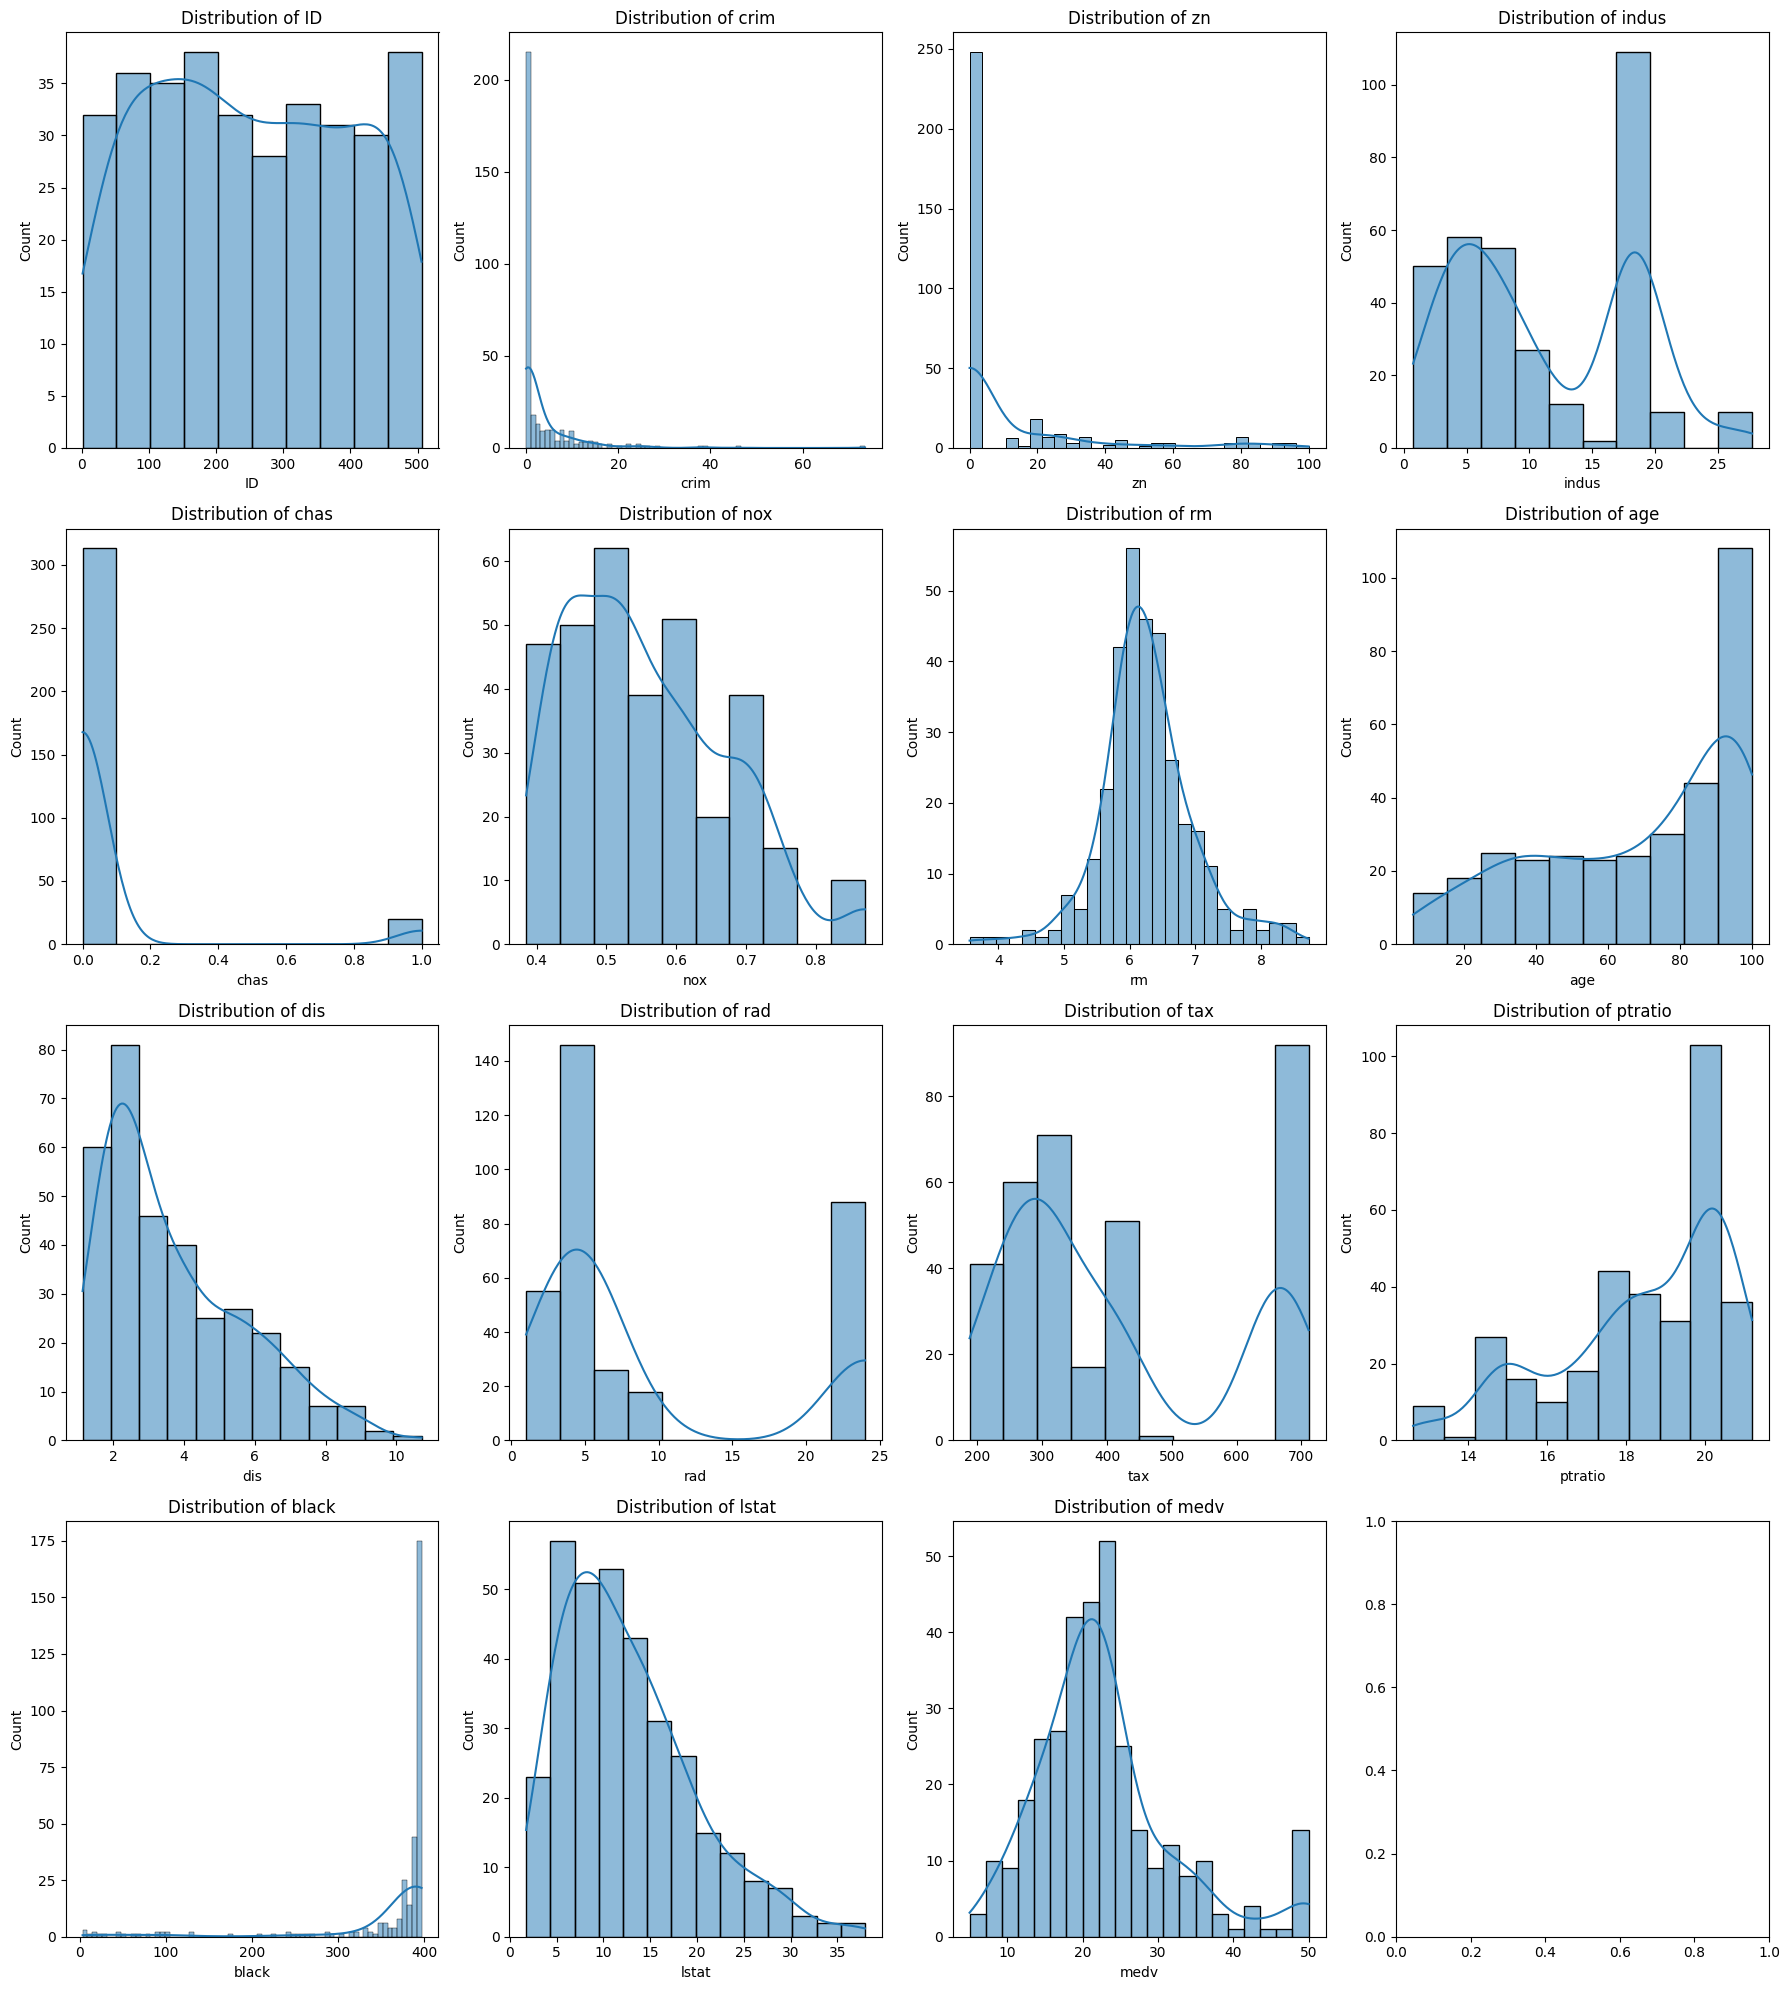

In [13]:

def plot_histograms(df):
    n_cols = 4
    n_rows = (len(df.columns) - 1) // n_cols + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

plot_histograms(train_df)

In [15]:
train_df = train_df.drop(columns=['id'], errors='ignore')
train_df['medv_log'] = np.log(train_df['medv'])

print(train_df.head())

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  medv_log  
0     15.3  396.90   4.98  24.0  3.178054  
1     17.8  396.90   9.14  21.6  3.072693  
2     18.7  394.63   2.94  33.4  3.508556  
3     18.7  396.90   5.33  36.2  3.589059  
4     15.2  395.60  12.43  22.9  3.131137  


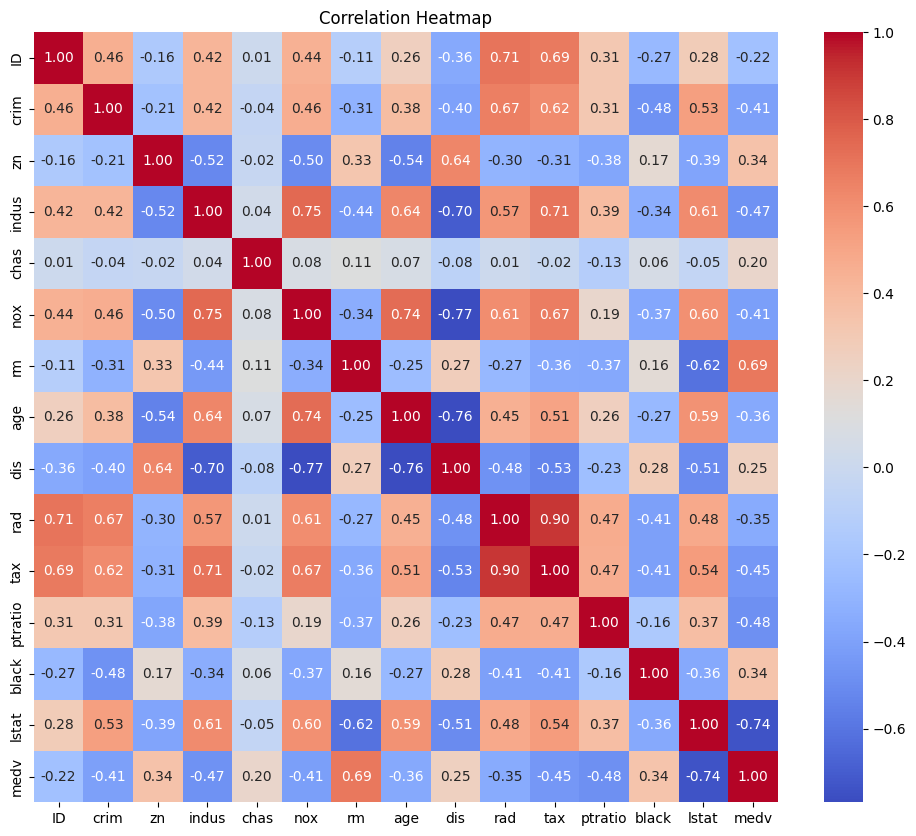

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

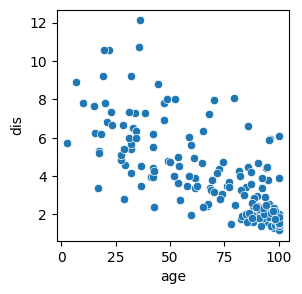

In [18]:
# Relationship between AGE, DIS.
plt.figure(figsize = (3, 3))
sns.scatterplot(x = 'age', y = 'dis', data = test_df)
plt.show()


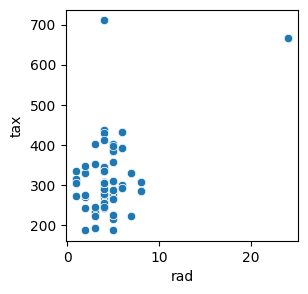

In [19]:
# Relationship between RAD, TAX.
plt.figure(figsize = (3, 3))
sns.scatterplot(x = 'rad', y = 'tax', data = test_df)
plt.show()


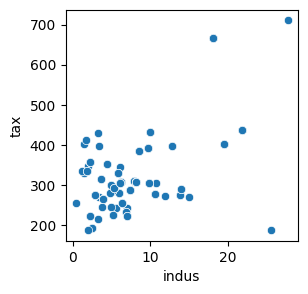

In [20]:
# Relationship between INDUS, TAX.
plt.figure(figsize = (3, 3))
sns.scatterplot(x = 'indus', y = 'tax', data = test_df)
plt.show()


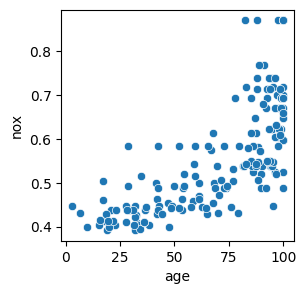

In [21]:
# Relationship between AGE, NOX
plt.figure(figsize = (3, 3))
sns.scatterplot(x = 'age', y = 'nox', data = test_df)
plt.show()


In [44]:
# Prepare training data
X_train = train_df.drop(columns=['medv', 'medv_log', 'ID'], errors='ignore')
y_train = train_df['medv']

# Prepare test data
X_test = test_df.drop(columns=['ID'], errors='ignore')



In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif.sort_values('VIF', ascending=False)

# Calculate VIF for training data
vif_df = check_vif(X_train)
print("Variance Inflation Factors:")
print(vif_df)


Variance Inflation Factors:
    feature        VIF
10  ptratio  86.123039
5        rm  83.056962
4       nox  75.640420
9       tax  56.334001
11    black  22.853979
6       age  21.929478
7       dis  15.707447
8       rad  14.649941
2     indus  13.801806
12    lstat  11.341896
0      crim   2.649245
1        zn   2.554112
3      chas   1.131439


In [46]:
import statsmodels.api as sm
model1 = sm.OLS(y_train,X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              582.0
Date:                Sun, 15 Sep 2024   Prob (F-statistic):                   8.76e-214
Time:                        15:23:40   Log-Likelihood:                         -1004.7
No. Observations:                 333   AIC:                                      2035.
Df Residuals:                     320   BIC:                                      2085.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0175      0.056     -0.314      0.753      -0.127       0.092
zn             0.0497      0.018      2.816      0.005       0.015       0.084
indus          0.0304      0.077      0.394      0.694      -0.122       0.183
chas           3.7935      1.200      3.162      0.002       1.433       6.153
nox           -1.2586      4.225     -0.298      0.766      -9.572       7.055
rm             5.6716      0.399     14.197      0.000       4.886       6.458
age           -0.0130      0.018     -0.740      0.460      -0.047       0.022
dis           -1.0812      0.261     -4.150      0.000      -1.594      -0.569
rad            0.1946      0.081      2.392      0.017       0.035       0.355
tax           -0.0099      0.005     -2.108      0.036      -0.019      -0.001
ptratio       -0.3213      0.138     -2.326      0.021      -0.593      -0.050
black          0.0176      0.004      4.924      0.000       0.011       0.025
lstat         -0.5202      0.065     -8.030      0.000      -0.648      -0.393
==============================================================================
Omnibus:                      139.313   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              715.387
Skew:                           1.697   Prob(JB):                    4.53e-156
Kurtosis:                       9.328   Cond. No.                     8.61e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**rm, nox, and ptratio have very high VIFs and may contribute to instability**

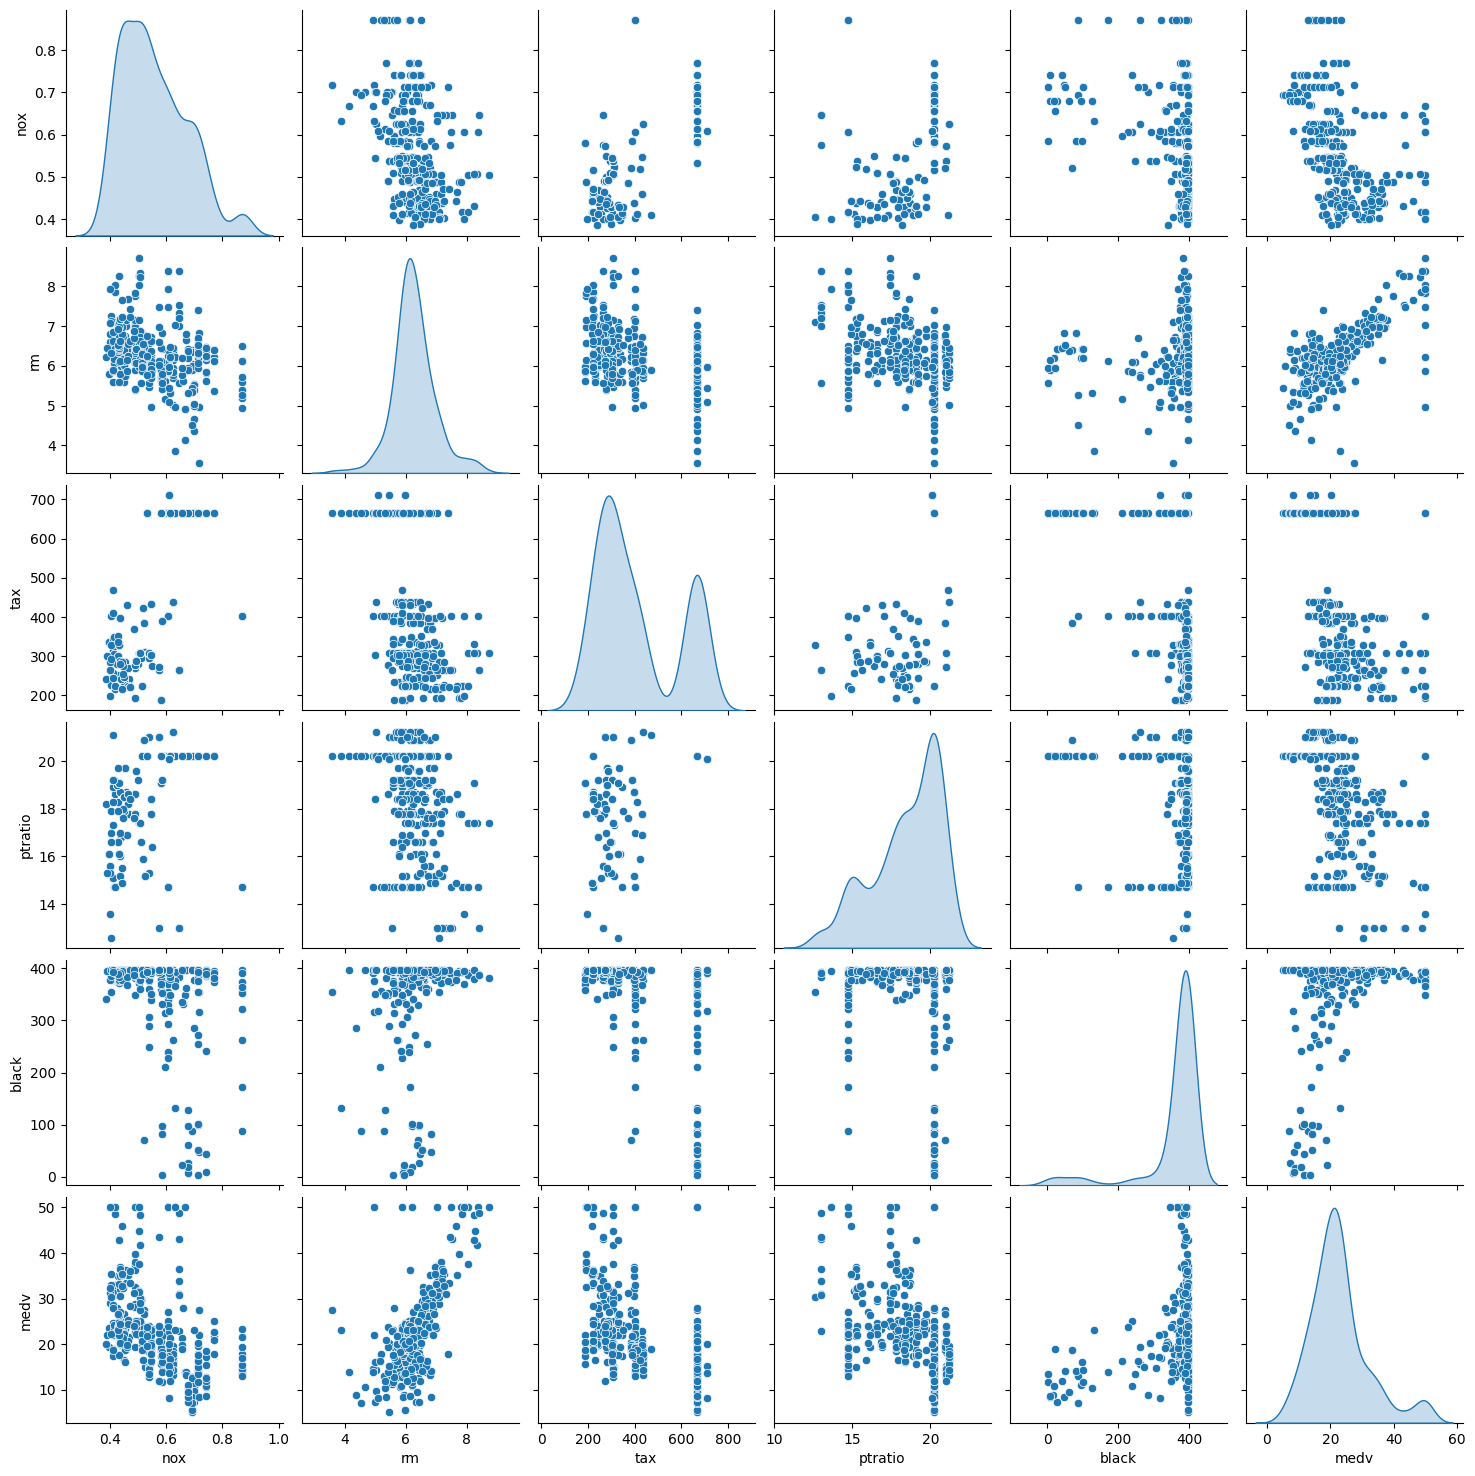

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of features with high VIF values
high_vif_features = ['nox', 'rm','tax', 'ptratio', 'black']

# Pairplot for high VIF features
sns.pairplot(train_df[high_vif_features + ['medv']], diag_kind='kde')
plt.show()


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif.sort_values('VIF', ascending=False)

# Prepare X_train
X_train = train_df.drop(['medv', 'medv_log', 'ID'], axis=1, errors='ignore')

# Calculate VIF
vif_df = check_vif(X_train)

# Define a threshold for high VIF; typically 10 is used
high_vif_features = vif_df[vif_df['VIF'] > 20]['feature']

# Create reduced feature set by removing high VIF features
X_train_reduced = X_train.drop(columns=high_vif_features, errors='ignore')


In [61]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_reduced, y_train)

# Check if model.coef_ is available
print("Model coefficients:", model.coef_)


Model coefficients: [-0.08953061  0.08549511 -0.24842534  5.7034888  -1.73735929  0.02612554
 -0.90400728]


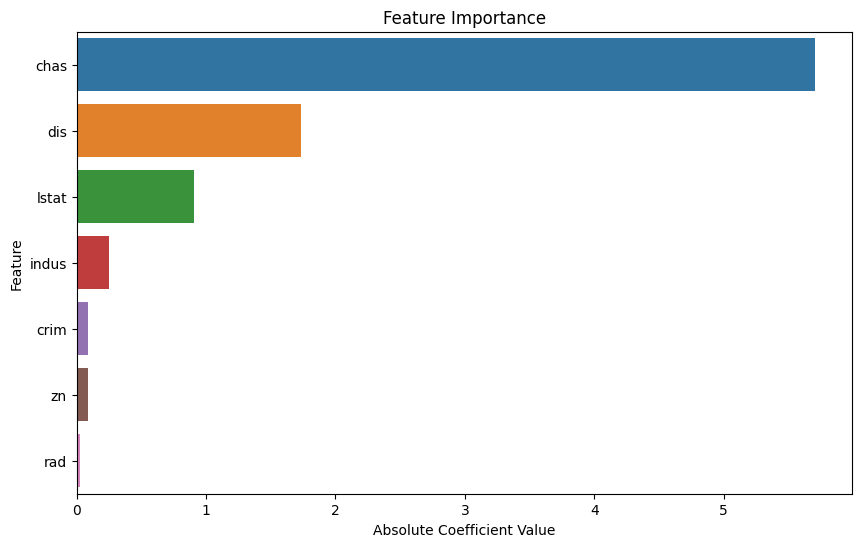

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure selected_features matches X_train_reduced
selected_features = X_train_reduced.columns

# Create DataFrame for feature importance
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': abs(model.coef_)
})

# Sort features by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [63]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=8)
rfe = rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]

X_train_selected = X_train[selected_features]
print("\nSelected features:", selected_features)

# 5. Model Training and Evaluation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)

models = {
    'Linear Regression': LinearRegression(),
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_train_scaled)
    
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())
    
    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R-squared': r2,
        'CV RMSE': cv_rmse
    })
    
    print(f"{name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R-squared: {r2:.4f}")
    print(f"  CV RMSE: {cv_rmse:.4f}")
    print()


Selected features: Index(['crim', 'chas', 'nox', 'rm', 'dis', 'rad', 'ptratio', 'lstat'], dtype='object')
Linear Regression:
  MSE: 24.1680
  RMSE: 4.9161
  MAE: 3.4592
  R-squared: 0.7119
  CV RMSE: 6.9133



---